In [94]:
import pandas as pd
import math

In [95]:
retail_df=pd.read_excel('data/Online Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [96]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [97]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [98]:
(retail_df["Quantity"]==0).sum()

0

In [99]:
retail_df=retail_df[retail_df["Quantity"]>0]
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]
retail_df['CustomerID']=retail_df['CustomerID'].astype(int)

In [100]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [101]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [102]:
retail_df.shape

(397884, 8)

In [103]:
retail_df.drop_duplicates(inplace=True)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


In [104]:
retail_df['StockCode'].value_counts()

StockCode
85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
          ... 
90059A       1
20678        1
90059D       1
90168        1
23843        1
Name: count, Length: 3665, dtype: int64

In [105]:
# 제품수, 거래건수, 고객수
df1=pd.DataFrame([{'Product':len(retail_df['StockCode'].value_counts()),
              'Transaction':len(retail_df['InvoiceNo'].value_counts()),
              'Customer':len(retail_df['CustomerID'].value_counts())}],
              columns=['Product', 'Transaction','Customer'], index=['counts'])
df1

,Product,Transaction,Customer
counts,3665,18532,4338


In [106]:
len(retail_df['StockCode'].value_counts())

3665

In [107]:
retail_df['Country'].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [108]:
# 구매금액=단가*수량
retail_df['SaleAmount']=retail_df['UnitPrice']*retail_df['Quantity']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [109]:
# 마케팅에 이용하기 위한 고객의 주문횟수, 주문총액, 마지막 주문 후 경과일
aggregations={'InvoiceNo':'count', 'SaleAmount':'sum', 'InvoiceDate':'max'}
customer_df=retail_df.groupby('CustomerID').agg(aggregations)
customer_df=customer_df.reset_index()
customer_df

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00
...,...,...,...,...
4333,18280,10,180.60,2011-03-07 09:52:00
4334,18281,7,80.82,2011-06-12 10:53:00
4335,18282,12,178.05,2011-12-02 11:43:00
4336,18283,721,2045.53,2011-12-06 12:02:00


In [110]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   4338 non-null   int32         
 1   InvoiceNo    4338 non-null   int64         
 2   SaleAmount   4338 non-null   float64       
 3   InvoiceDate  4338 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 118.7 KB


In [111]:
customer_df=customer_df.rename(columns={'InvoiceNo':'Freq',
                                        'InvoiceDate':'ElapsedDays'})
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [112]:
import datetime
customer_df['ElapsedDays']=datetime.datetime(2011,12,31)-customer_df['ElapsedDays']
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,346 days 13:59:00
1,12347,182,4310.00,23 days 08:08:00
2,12348,31,1797.24,96 days 10:47:00
3,12349,73,1757.55,39 days 14:09:00
4,12350,17,334.40,331 days 07:59:00


In [113]:
customer_df['ElapsedDays']=customer_df['ElapsedDays'].apply(lambda x: x.days+1)
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,347
1,12347,182,4310.00,24
2,12348,31,1797.24,97
3,12349,73,1757.55,40
4,12350,17,334.40,332


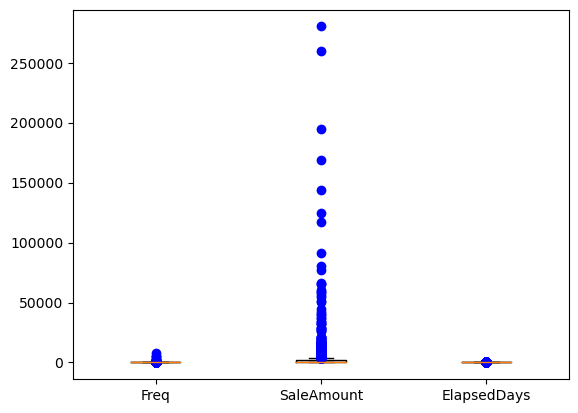

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], 
            customer_df['ElapsedDays']],sym='bo')
plt.xticks([1,2,3],['Freq','SaleAmount','ElapsedDays'])
plt.show()

In [115]:
# log로 데이터 값 크기 조정
import numpy as np
customer_df['Freq_log']=np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log']=np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log']=np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,347,0.693147,11.253955,5.852202
1,12347,182,4310.00,24,5.209486,8.368925,3.218876
2,12348,31,1797.24,97,3.465736,7.494564,4.584967
3,12349,73,1757.55,40,4.304065,7.472245,3.713572
4,12350,17,334.40,332,2.890372,5.815324,5.808142


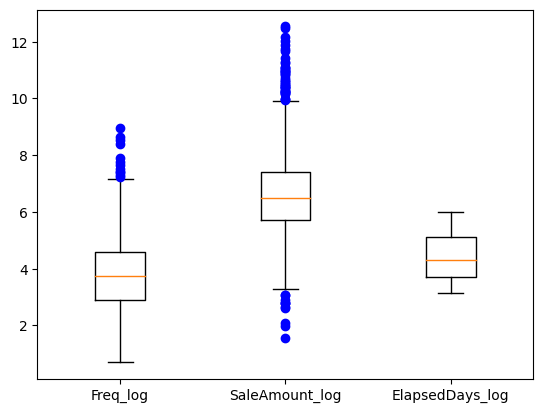

In [116]:
fig, ax=plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], 
customer_df['ElapsedDays_log']],
sym='bo')
plt.xticks([1,2,3],['Freq_log','SaleAmount_log','ElapsedDays_log'])
plt.show()

In [117]:
# K평균 군집화 모델 구축
# x_features를 정규분포로 스케일링 하기

In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [119]:
x_features=customer_df[['Freq_log', 'SaleAmount_log','ElapsedDays_log']].values
x_features

array([[ 0.69314718, 11.25395523,  5.85220248],
       [ 5.20948615,  8.36892517,  3.21887582],
       [ 3.4657359 ,  7.49456369,  4.58496748],
       ...,
       [ 2.56494936,  5.1876651 ,  3.40119738],
       [ 6.58202514,  7.62390095,  3.25809654],
       [ 4.26267988,  7.51658563,  4.17438727]])

In [120]:
from sklearn.preprocessing import StandardScaler
x_features_scaled=StandardScaler().fit_transform(x_features)
x_features_scaled

array([[-2.43820181,  3.7077163 ,  1.75491769],
       [ 1.18898578,  1.41490344, -1.41929401],
       [-0.21146474,  0.72002428,  0.22739274],
       ...,
       [-0.9349095 , -1.11333158, -1.19952363],
       [ 2.29130702,  0.82281217, -1.37201737],
       [ 0.42858139,  0.73752572, -0.26752061]])

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

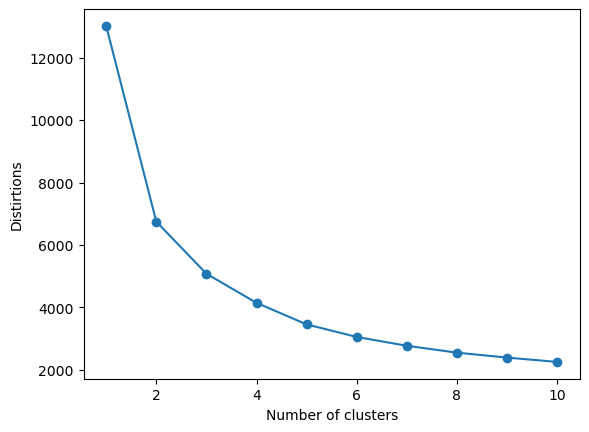

In [121]:
distortions=[]
for i in range(1, 11):
    kmeans_i=KMeans(n_clusters=i, random_state=0)
    kmeans_i.fit(x_features_scaled)
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distirtions')
plt.show()

In [122]:
kmeans=KMeans(n_clusters=3, random_state=0)
y_label=kmeans.fit_predict(x_features_scaled)
customer_df['ClusterLabel']=y_label
customer_df.head()

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,347,0.693147,11.253955,5.852202,0
1,12347,182,4310.00,24,5.209486,8.368925,3.218876,1
2,12348,31,1797.24,97,3.465736,7.494564,4.584967,2
3,12349,73,1757.55,40,4.304065,7.472245,3.713572,1
4,12350,17,334.40,332,2.890372,5.815324,5.808142,0


In [123]:
from matplotlib import cm

# 실루엣 스코어 차트 작성, n_cluster: 군집화 수, x_features: 군집화할 데이터
def silhouetteViz(n_cluster, x_features): 
    kmeans=KMeans(n_clusters=n_cluster, random_state=0) # KMeans 모델 작성
    y_labels=kmeans.fit_predict(x_features) #KMeans 모델 훈련

    # 실루엤 값 구하기
    silhouette_values=silhouette_samples(x_features, y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper=0,0 # 실루엣 그래프 각 클러스터의 y축의 최소 최대값
    y_ticks=[] #y축 눈금 값 리스트

    for c in range(n_cluster): #클러스터 개수 만큼 반복
        c_silhouettes=silhouette_values[y_label==c] # y_label과 클러스터 같은 것만 선택
        c_silhouettes.sort() # 실루엣 정렬
        y_ax_upper+=len(c_silhouettes) # y_ax_upper를 현재 클러스터의 실루엣 수만큼 증가
        color=cm.jet(float(c)/n_cluster) # 실루엣 데이터 색상 설정
        # 수평바 차트로 실루엣 값 그림
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height=1.0, 
                 edgecolor='none', color=color)
        # y_ticks 리스트에 각클러스터 최소값과 최대값 평균을 저장
        y_ticks.append((y_ax_lower+y_ax_upper)/2.)
        # 파음 클러스터의 최소값 설정
        y_ax_lower+=len(c_silhouettes)
    
    silhouette_avg=np.mean(silhouette_values) # 실루엣 값의 평균 구함
    plt.axvline(silhouette_avg, color='red', linestyle="--") # 실루엣 값 평균 그래프 그림
    plt.title("Number of Cluster:"+str(n_cluster)+"\n"
              +'silhoutte score:'+str(round(silhouette_avg, 3)))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.yticks(y_ticks, range(n_cluster))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


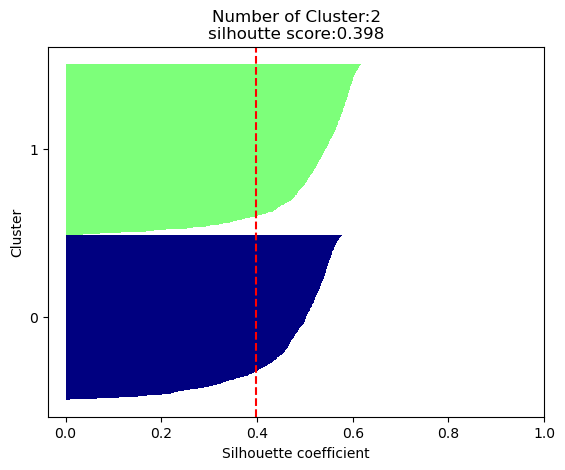

In [124]:
silhouetteViz(2, x_features_scaled) # 실루엣 그래프 함수 호출(클러스터 2)

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


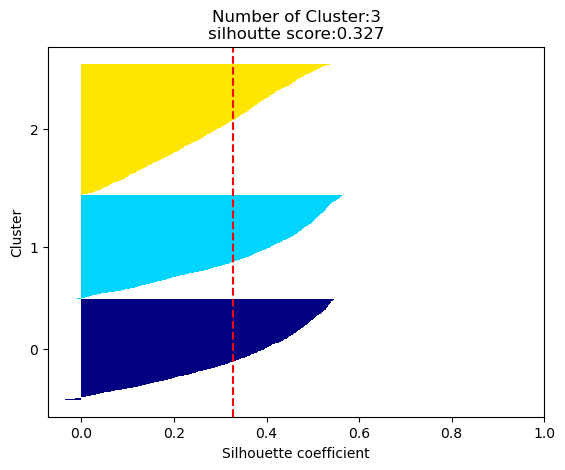

In [125]:
silhouetteViz(3, x_features_scaled) # 실루엣 그래프 함수 호출(클러스터 3)

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


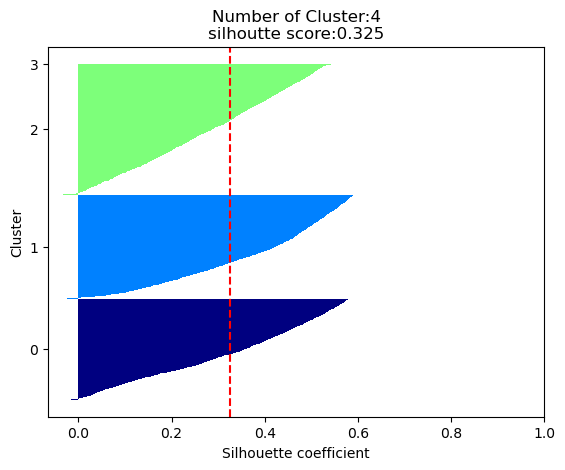

In [126]:
silhouetteViz(4, x_features_scaled) # 실루엣 그래프 함수 호출(클러스터 4)

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


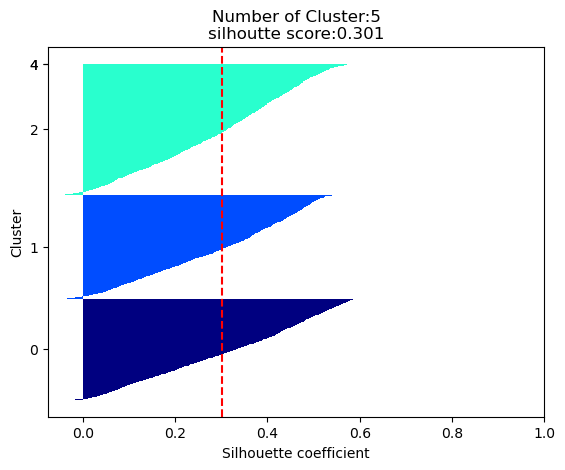

In [127]:
silhouetteViz(5, x_features_scaled) # 실루엣 그래프 함수 호출(클러스터 5)

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


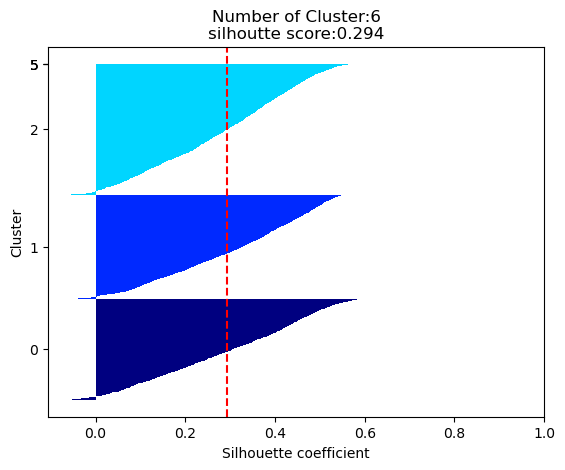

In [128]:
silhouetteViz(6, x_features_scaled) # 실루엣 그래프 함수 호출(클러스터 6)

In [129]:
# 클러스터 분포 그래프 함수(클러스터 수, 입력데이터)
def clusterScatter(n_cluster, x_features):
    c_colors=[]
    kmeans=KMeans(n_clusters=n_cluster, random_state=0)
    y_labels=kmeans.fit_predict(x_features) # 학습된 모델에 의해 예측

   #클러스터의 데이터 분포를 원으로 그림
    for i in range(n_cluster):
          c_color=cm.jet(float(i)/n_cluster) # 클러스터별 색상 설정
          c_colors.append(c_color) # color listdp 색상값 추가
          # 산점도 그래프를 사용하여 특징을 클러스별로 차트를 그림
          plt.scatter(x_features[y_labels==i, 0], x_features[y_labels==i,1], 
                      marker='o',color=c_color, edgecolor='black', s=50, 
                      label='cluster'+str(i))

    # 각 클러스터의 중심점을 삼각형으로 그림
    for i in range(n_cluster):
          plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
    plt.legend()
    plt.grid()
    plt.show()

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


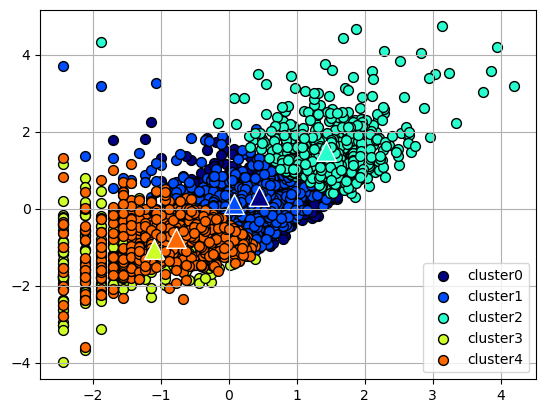

In [130]:
clusterScatter(5, x_features_scaled)

In [131]:
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,347,0.693147,11.253955,5.852202,0
1,12347,182,4310.00,24,5.209486,8.368925,3.218876,1
2,12348,31,1797.24,97,3.465736,7.494564,4.584967,2
3,12349,73,1757.55,40,4.304065,7.472245,3.713572,1
4,12350,17,334.40,332,2.890372,5.815324,5.808142,0


In [132]:
# cluster 별 특징
group_customer=customer_df.groupby('ClusterLabel').agg({'Freq':'mean', 
'SaleAmount':'mean', 'ElapsedDays':'mean'})
group_customer

,Freq,SaleAmount,ElapsedDays
ClusterLabel,,,
0,20.931748,437.247101,239.519939
1,221.855234,5345.401330,52.443950
2,39.453468,661.993529,66.279787
